# Recurrent Neural Network (RNN)
## Part 1 - Data Preprocessing

This is the 1st step of building our machine learning model

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Importing the training set
dataset_train = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
dataset_train = np.array(dataset_train)
dataset_train

array([['2006-01-03', 77.76, 79.35, ..., 79.11, 3117200, 'MMM'],
       ['2006-01-04', 79.49, 79.49, ..., 78.71, 2558000, 'MMM'],
       ['2006-01-05', 78.41, 78.65, ..., 77.99, 2529500, 'MMM'],
       ...,
       ['2017-12-27', 69.77, 70.49, ..., 70.06, 6345124, 'AABA'],
       ['2017-12-28', 70.12, 70.32, ..., 69.82, 7556877, 'AABA'],
       ['2017-12-29', 69.79, 70.13, ..., 69.85, 6613070, 'AABA']],
      dtype=object)

In [4]:
for n in range(0,31):
    Google = []
    Amazon = []
    dates = []
    for j in range(0,93612):
        if dataset_train[j,6] == 'GOOGL':
            Google.append(dataset_train[j,1])
        if dataset_train[j,6] == 'AMZN':
            Amazon.append(dataset_train[j,1])
            dates.append(dataset_train[j,0])
    Google = np.array(Google)
    Google = Google.reshape(-1,1)
    Amazon = np.array(Amazon)
    Amazon = Amazon.reshape(-1,1)
    dates = np.array(dates)
    dates = dates.reshape(-1,1)

In [6]:
Amazon

array([[  47.47],
       [  47.48],
       [  47.16],
       ...,
       [1179.91],
       [1189.  ],
       [1182.35]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
Google = sc.fit_transform(Google)
Amazon = sc.fit_transform(Amazon)

In [8]:
Amazon

array([[0.01813724],
       [0.01814573],
       [0.01787426],
       ...,
       [0.97881726],
       [0.98652856],
       [0.98088718]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2917):
    X_train.append(Google[i-60:i, 0])
    y_train.append(Google[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(2917, 3017):
    X_test.append(Google[i-60:i, 0])
    y_test.append(Google[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#################################################################
# Creating a data structure with 60 timesteps and 1 output
X_train1 = []
y_train1 = []
for i in range(60, 2917):
    X_train1.append(Amazon[i-60:i, 0])
    y_train1.append(Amazon[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

X_test1 = []
y_test1 = []
for i in range(2917, 3017):
    X_test1.append(Amazon[i-60:i, 0])
    y_test1.append(Amazon[i, 0])
X_test1, y_test1 = np.array(X_test1), np.array(y_test1)
y_train1 = y_train1.reshape(-1,1)
y_test1 = y_test1.reshape(-1,1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))

In [10]:
X_test1.shape

(100, 60, 1)

In [6]:
X_TRAIN = np.concatenate((X_train, X_train1),axis=2)
Y_TRAIN = np.concatenate((y_train, y_train1),axis=1)

X_TEST = np.concatenate((X_test, X_test1),axis=2)
Y_TEST = np.concatenate((y_test, y_test1),axis=1)

In [7]:
X_TRAIN.shape

(2857, 60, 2)

In [8]:
Y_TRAIN.shape

(2857, 2)

In [9]:
X_TEST.shape

(100, 60, 2)

In [10]:
Y_TEST.shape

(100, 2)

## Part 2 - Building the RNN

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
regressor = Sequential()

# Adding a input LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, input_shape = (X_TRAIN.shape[1], 2)))

# Adding the output layer
regressor.add(Dense(units = 2))

# Compiling the RNN
history1 = regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error',metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.summary();
history1 = regressor.fit(X_TRAIN, Y_TRAIN, batch_size = 200, epochs = 100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               162400    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 162,802
Trainable params: 162,802
Non-trainable params: 0
_________________________________________________________________

Epoch 1/100
2857/2857 [==============================] - 4s 1ms/step - loss: 0.0816 - accuracy: 0.9461
Epoch 2/100
2857/2857 [==============================] - 4s 1ms/step - loss: 0.0261 - accuracy: 0.9450
Epoch 3/100
2857/2857 [==============================] - 4s 1ms/step - loss: 0.0140 - accuracy: 0.9471
Epoch 4/100
2857/2857 [==============================] - 4s 1ms/step - loss: 0.0094 - accuracy: 0.9643
Epoch 5/100
2857/2857 [==============================] - 4s 1ms/step - loss: 0.0085 - accuracy: 0

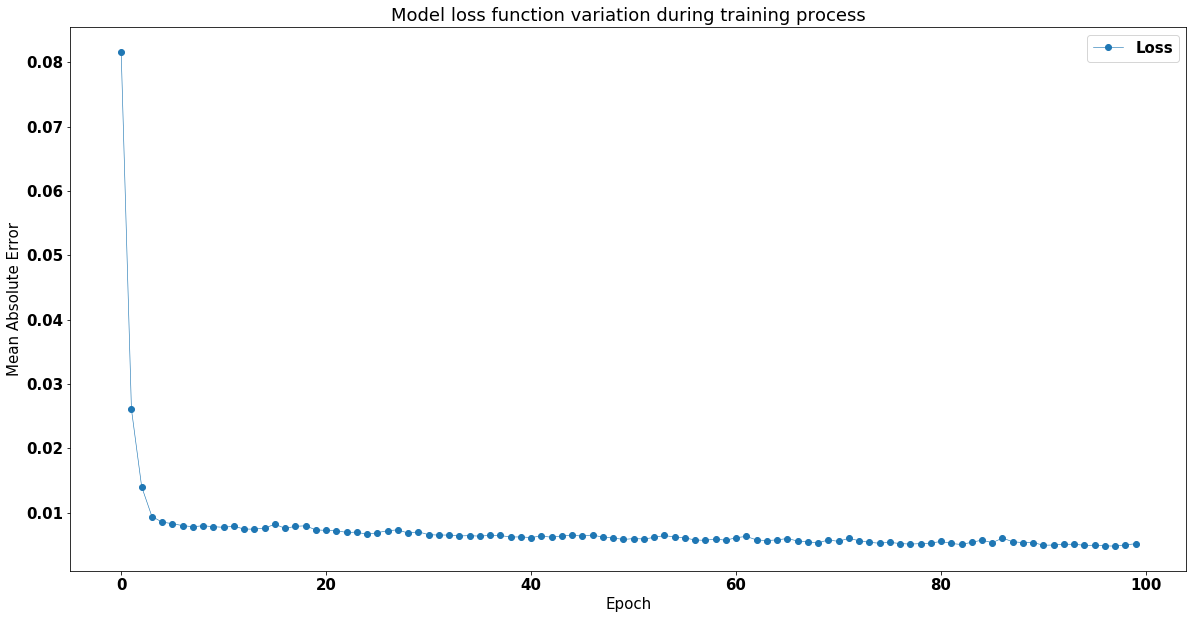

In [35]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':15}
plt.rc('font',**font)
plt.plot(history1.history['loss'],'o-',lw=0.6)
plt.title('Model loss function variation during training process')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.show()

## Part 3 - Making the predictions

In [14]:
predicted_stock_price = regressor.predict(X_TEST)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [15]:
real_stock_price = sc.inverse_transform(Y_TEST)

## Part 4 - Visualising the results

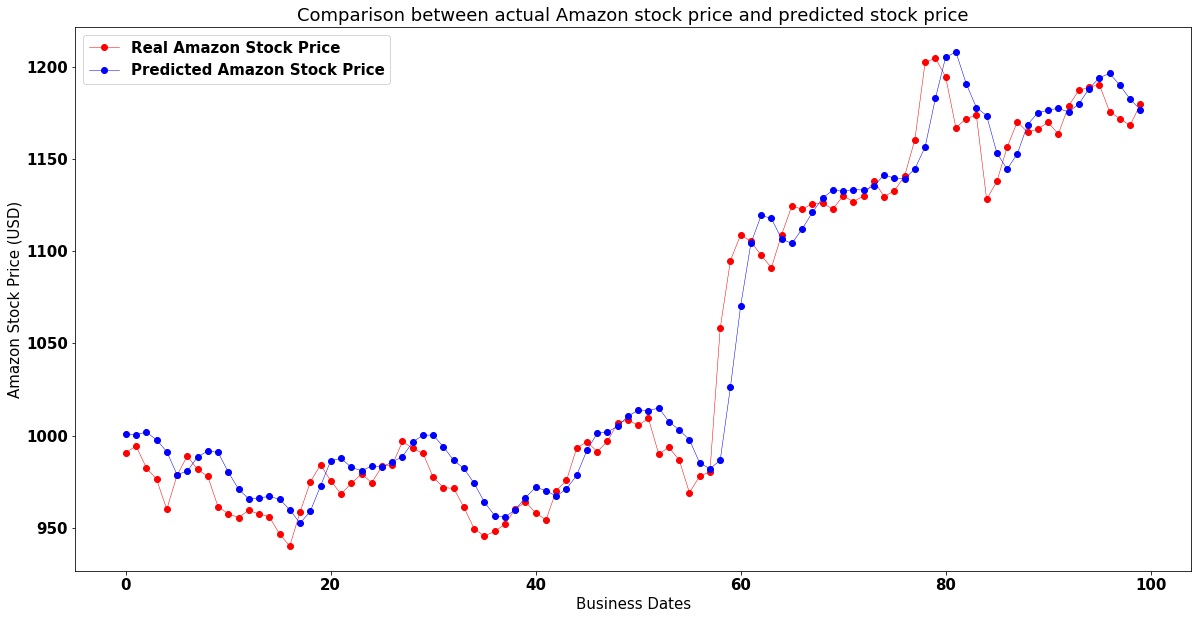

In [37]:
# Visualising the results
plt.rcParams['figure.figsize']=(20,10)
font = {'family':'DejaVu Sans','weight':'bold','size':15}
plt.rc('font',**font)
plt.plot(real_stock_price[:,1],'o-',lw=0.5, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price[:,1],'o-',lw=0.5, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Comparison between actual Amazon stock price and predicted stock price')
plt.xlabel('Business Dates')
plt.ylabel('Amazon Stock Price (USD)')
plt.legend()
plt.show()

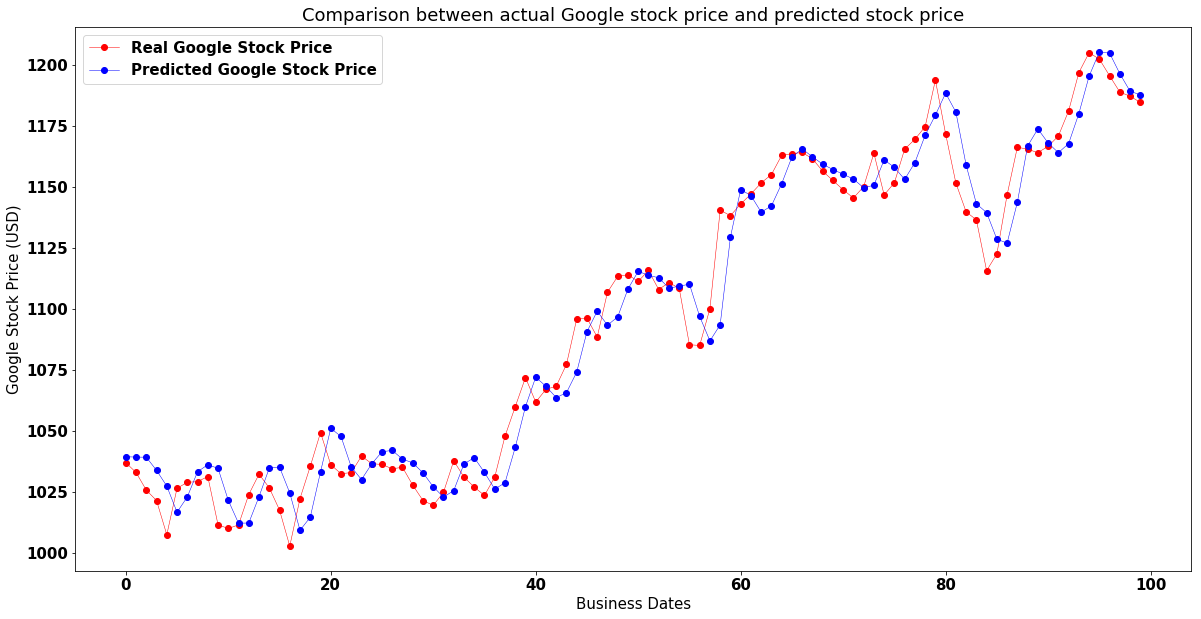

In [38]:
# Visualising the results
plt.rcParams['figure.figsize']=(20,10)
font = {'family':'DejaVu Sans','weight':'bold','size':15}
plt.rc('font',**font)
plt.plot(real_stock_price[:,0], 'o-',lw=0.5, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,0], 'o-', lw=0.5,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Comparison between actual Google stock price and predicted stock price')
plt.xlabel('Business Dates')
plt.ylabel('Google Stock Price (USD)')
plt.legend()
plt.show()

## Part 5 - Model Performance Evaluation

In [18]:
# Getting predicted stock price trend
trend_prediction = []
X = 0
for i in range(0,99):
  # for upwards trend of price
  if predicted_stock_price[i,0] < predicted_stock_price[i+1,0]:
    X = 1
  # for downwards trend of price
  if predicted_stock_price[i,0] >= predicted_stock_price[i+1,0]:
    X = 0
  trend_prediction.append(X)

In [19]:
# Getting real stock price trend
trend = []
Y = 0
for i in range(0,99):
  # for upwards trend of price
  if real_stock_price[i,0] < real_stock_price[i+1,0]:
    Y = 1
  # for downwards trend of price
  if real_stock_price[i,0] >= real_stock_price[i+1,0]:
    Y = 0
  trend.append(Y)

In [20]:
print(confusion_matrix(trend, trend_prediction))

[[27 19]
 [23 30]]


In [21]:
print(accuracy_score(trend, trend_prediction))

0.5757575757575758


In [22]:
print(classification_report(trend, trend_prediction))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        46
           1       0.61      0.57      0.59        53

   micro avg       0.58      0.58      0.58        99
   macro avg       0.58      0.58      0.58        99
weighted avg       0.58      0.58      0.58        99



In [23]:
# Getting predicted stock price trend
trend_prediction = []
X = 0
for i in range(0,99):
  # for upwards trend of price
  if predicted_stock_price[i,1] < predicted_stock_price[i+1,1]:
    X = 1
  # for downwards trend of price
  if predicted_stock_price[i,1] >= predicted_stock_price[i+1,1]:
    X = 0
  trend_prediction.append(X)

In [24]:
# Getting real stock price trend
trend = []
Y = 0
for i in range(0,99):
  # for upwards trend of price
  if real_stock_price[i,1] < real_stock_price[i+1,1]:
    Y = 1
  # for downwards trend of price
  if real_stock_price[i,1] >= real_stock_price[i+1,1]:
    Y = 0
  trend.append(Y)

In [25]:
print(confusion_matrix(trend, trend_prediction))

[[20 25]
 [26 28]]


In [26]:
print(accuracy_score(trend, trend_prediction))

0.48484848484848486


In [27]:
print(classification_report(trend, trend_prediction))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44        45
           1       0.53      0.52      0.52        54

   micro avg       0.48      0.48      0.48        99
   macro avg       0.48      0.48      0.48        99
weighted avg       0.49      0.48      0.49        99

